<center><h1>Data Preparation </h1></center>

In [50]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
mpl.style.use('ggplot')

In [51]:
#read the data
data = pd.read_csv("Data-Collisions.csv")
print("Data read into dataframe!") 

C:\Users\ELCOT\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Data read into dataframe!


In [52]:
data.head(4)

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N


<h2>Datatypes of the data</h2>

In [53]:
#info about data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 38 columns):
SEVERITYCODE      194673 non-null int64
X                 189339 non-null float64
Y                 189339 non-null float64
OBJECTID          194673 non-null int64
INCKEY            194673 non-null int64
COLDETKEY         194673 non-null int64
REPORTNO          194673 non-null object
STATUS            194673 non-null object
ADDRTYPE          192747 non-null object
INTKEY            65070 non-null float64
LOCATION          191996 non-null object
EXCEPTRSNCODE     84811 non-null object
EXCEPTRSNDESC     5638 non-null object
SEVERITYCODE.1    194673 non-null int64
SEVERITYDESC      194673 non-null object
COLLISIONTYPE     189769 non-null object
PERSONCOUNT       194673 non-null int64
PEDCOUNT          194673 non-null int64
PEDCYLCOUNT       194673 non-null int64
VEHCOUNT          194673 non-null int64
INCDATE           194673 non-null object
INCDTTM           194673 non-null obje

drop the unwanted columns like object data types, null values, same value of columns and unrelated columns.<br>
**eg:**<br>
INCKEY and COLDETKEY both are same information. INCKEY is a unique key for the incident. COLDETKEY is secondary key for the incident 

In [54]:
df1= data.drop(['X','Y','INTKEY','COLDETKEY','REPORTNO','LOCATION','SEVERITYCODE.1','EXCEPTRSNCODE','EXCEPTRSNDESC','SEVERITYDESC','INCDATE','INCDTTM','SDOT_COLCODE','SDOT_COLDESC','INATTENTIONIND','UNDERINFL','PEDROWNOTGRNT','SDOTCOLNUM','SPEEDING','ST_COLDESC','SEGLANEKEY','CROSSWALKKEY','HITPARKEDCAR'],axis=1)

In [55]:
df1.head()

,SEVERITYCODE,OBJECTID,INCKEY,STATUS,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,JUNCTIONTYPE,WEATHER,ROADCOND,LIGHTCOND,ST_COLCODE
0,2,1,1307,Matched,Intersection,Angles,2,0,0,2,At Intersection (intersection related),Overcast,Wet,Daylight,10
1,1,2,52200,Matched,Block,Sideswipe,2,0,0,2,Mid-Block (not related to intersection),Raining,Wet,Dark - Street Lights On,11
2,1,3,26700,Matched,Block,Parked Car,4,0,0,3,Mid-Block (not related to intersection),Overcast,Dry,Daylight,32
3,1,4,1144,Matched,Block,Other,3,0,0,3,Mid-Block (not related to intersection),Clear,Dry,Daylight,23
4,2,5,17700,Matched,Intersection,Angles,2,0,0,2,At Intersection (intersection related),Raining,Wet,Daylight,10


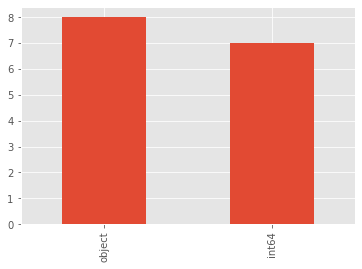

In [56]:
df1.dtypes.value_counts().plot(kind='bar')

Visualize for objects(string) values of the columns

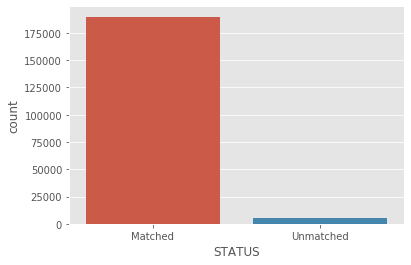

In [57]:
sns.countplot(df1['STATUS'], data=df1)

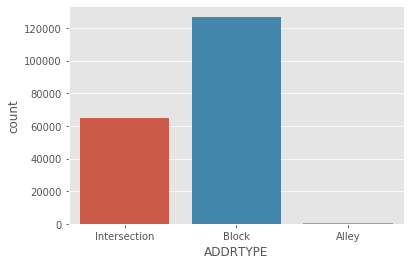

In [58]:
sns.countplot(df1['ADDRTYPE'], data=df1)

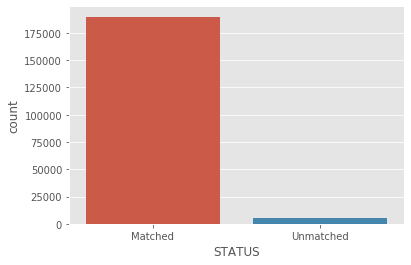

In [59]:
sns.countplot(df1['STATUS'], data=df1)

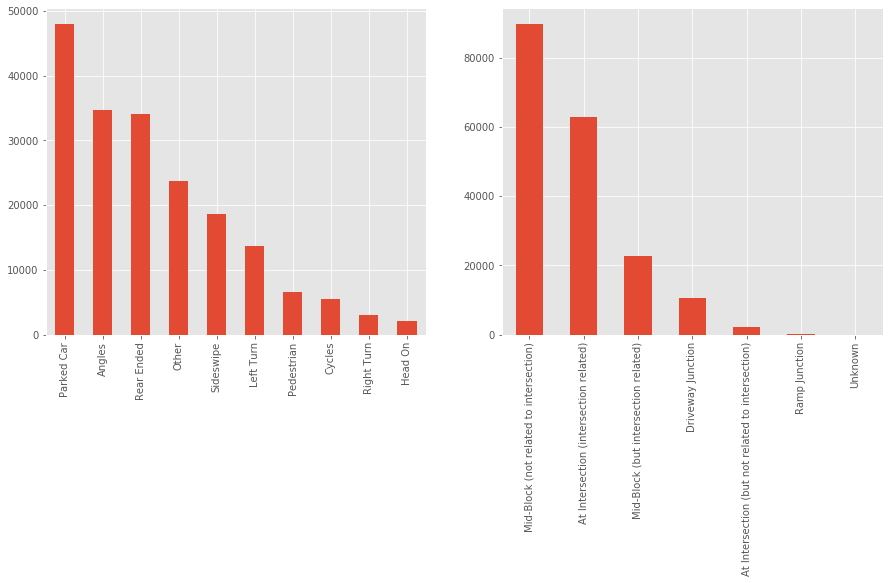

In [60]:
fig = plt.figure() 

ax0 = fig.add_subplot(1, 2, 1)
ax1 = fig.add_subplot(1, 2, 2)
df1['COLLISIONTYPE'].value_counts().plot(kind='bar',figsize=(15, 6), ax=ax0)
df1['JUNCTIONTYPE'].value_counts().plot(kind='bar',figsize=(15, 6), ax=ax1)

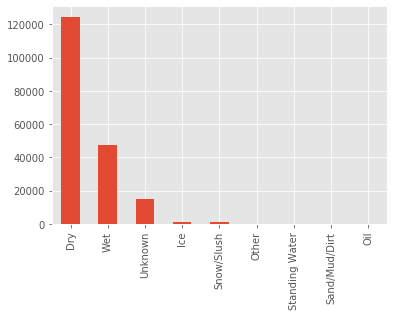

In [61]:
df1['ROADCOND'].value_counts().plot(kind='bar')

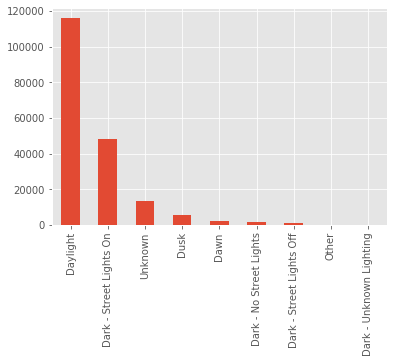

In [62]:
df1['LIGHTCOND'].value_counts().plot(kind='bar')

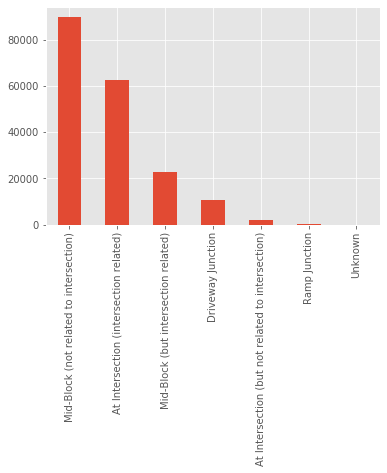

In [63]:
df1['JUNCTIONTYPE'].value_counts().plot(kind='bar')

And also drop the columns in many object values.

<h2>Missing Values of data</h2>

In [65]:
df = df1

In [66]:
df.shape

(194673, 15)

In [67]:
Null_values = df.isnull().sum()
Null_values[0:15]

SEVERITYCODE        0
OBJECTID            0
INCKEY              0
STATUS              0
ADDRTYPE         1926
COLLISIONTYPE    4904
PERSONCOUNT         0
PEDCOUNT            0
PEDCYLCOUNT         0
VEHCOUNT            0
JUNCTIONTYPE     6329
WEATHER          5081
ROADCOND         5012
LIGHTCOND        5170
ST_COLCODE         18
dtype: int64

In [68]:
df['ST_COLCODE'] = df['ST_COLCODE'].fillna(0)

In [69]:
Null_values = df.isnull().sum()
Null_values[0:15]

SEVERITYCODE        0
OBJECTID            0
INCKEY              0
STATUS              0
ADDRTYPE         1926
COLLISIONTYPE    4904
PERSONCOUNT         0
PEDCOUNT            0
PEDCYLCOUNT         0
VEHCOUNT            0
JUNCTIONTYPE     6329
WEATHER          5081
ROADCOND         5012
LIGHTCOND        5170
ST_COLCODE          0
dtype: int64

<h2>Encoding the data</h2>

In [70]:
#Address type
df['ADDRTYPE'] = df['ADDRTYPE'].fillna(0)
df['ADDRTYPE'] = df['ADDRTYPE'].replace(0,'others')

In [71]:
#addrtype
from sklearn import preprocessing
addrtype = preprocessing.LabelEncoder()
addrtype.fit(['Intersection','Block','Alley','others'])
df['ADDRTYPE'] = addrtype.transform(df['ADDRTYPE'])

In [72]:
list(addrtype.classes_)

['Alley', 'Block', 'Intersection', 'others']

<ul>
<li>Intersection - 2</li>
<li>Block - 1</li>
<li>Alley - 0</li>
<li>others - 3</li>
    </ul>

In [73]:
#status
from sklearn import preprocessing
status = preprocessing.LabelEncoder()
status.fit(['Unmatched','Matched'])
df['STATUS'] = status.transform(df['STATUS'])

In [74]:
list(status.classes_)

['Matched', 'Unmatched']

<ul>
<li>Matched - 0</li>
<li>Unmatched - 1</li>

</ul>

In [75]:
#Weather
df['WEATHER'] = df['WEATHER'].fillna(0)
df['WEATHER'] = df['WEATHER'].replace(0,'others')

In [76]:
from sklearn import preprocessing
weathercond = preprocessing.LabelEncoder()
weathercond.fit(['Clear','Raining','Overcast','Unknown','Snowing','Other','Fog/Smog/Smoke','Sleet/Hail/Freezing Rain','Blowing Sand/Dirt','Severe Crosswind','Partly Cloudy','others'])
df['WEATHER'] = weathercond.transform(df['WEATHER'])

In [77]:
list(weathercond.classes_)

['Blowing Sand/Dirt',
 'Clear',
 'Fog/Smog/Smoke',
 'Other',
 'Overcast',
 'Partly Cloudy',
 'Raining',
 'Severe Crosswind',
 'Sleet/Hail/Freezing Rain',
 'Snowing',
 'Unknown',
 'others']

In [78]:
#Road Condition
df['ROADCOND'] = df['ROADCOND'].fillna(0)
df['ROADCOND'] = df['ROADCOND'].replace(0,'others')

In [79]:
from sklearn import preprocessing
roadcond = preprocessing.LabelEncoder()
roadcond.fit(['Dry','Wet','Unknown','Ice','Snow/Slush','Other','Standing Water','Sand/Mud/Dirt','Oil','others'])
df['ROADCOND'] = roadcond.transform(df['ROADCOND'])

In [80]:
list(roadcond.classes_)

['Dry',
 'Ice',
 'Oil',
 'Other',
 'Sand/Mud/Dirt',
 'Snow/Slush',
 'Standing Water',
 'Unknown',
 'Wet',
 'others']

In [81]:
#Light Condition
df['LIGHTCOND'] = df['LIGHTCOND'].fillna(0)
df['LIGHTCOND'] = df['LIGHTCOND'].replace(0,'others')

In [82]:
from sklearn import preprocessing
light = preprocessing.LabelEncoder()
light.fit(df['LIGHTCOND'])
df['LIGHTCOND'] = light.transform(df['LIGHTCOND'])

In [83]:
list(light.classes_)

['Dark - No Street Lights',
 'Dark - Street Lights Off',
 'Dark - Street Lights On',
 'Dark - Unknown Lighting',
 'Dawn',
 'Daylight',
 'Dusk',
 'Other',
 'Unknown',
 'others']

In [84]:
#Collision Type
df['COLLISIONTYPE'] = df['COLLISIONTYPE'].fillna(0)
df['COLLISIONTYPE'] = df['COLLISIONTYPE'].replace(0,'others')

In [85]:
from sklearn import preprocessing
coll = preprocessing.LabelEncoder()
coll.fit(df['COLLISIONTYPE'])
df['COLLISIONTYPE'] = coll.transform(df['COLLISIONTYPE'])

In [86]:
list(coll.classes_)

['Angles',
 'Cycles',
 'Head On',
 'Left Turn',
 'Other',
 'Parked Car',
 'Pedestrian',
 'Rear Ended',
 'Right Turn',
 'Sideswipe',
 'others']

In [87]:
#Juction Type
#Collision Type
df['JUNCTIONTYPE'] = df['JUNCTIONTYPE'].fillna(0)
df['JUNCTIONTYPE'] = df['JUNCTIONTYPE'].replace(0,'others')

In [88]:
from sklearn import preprocessing
jun = preprocessing.LabelEncoder()
jun.fit(df['JUNCTIONTYPE'])
df['JUNCTIONTYPE'] = jun.transform(df['JUNCTIONTYPE'])

In [89]:
list(jun.classes_)

['At Intersection (but not related to intersection)',
 'At Intersection (intersection related)',
 'Driveway Junction',
 'Mid-Block (but intersection related)',
 'Mid-Block (not related to intersection)',
 'Ramp Junction',
 'Unknown',
 'others']

In [90]:
df.head()

,SEVERITYCODE,OBJECTID,INCKEY,STATUS,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,JUNCTIONTYPE,WEATHER,ROADCOND,LIGHTCOND,ST_COLCODE
0,2,1,1307,0,2,0,2,0,0,2,1,4,8,5,10
1,1,2,52200,0,1,9,2,0,0,2,4,6,8,2,11
2,1,3,26700,0,1,5,4,0,0,3,4,4,0,5,32
3,1,4,1144,0,1,4,3,0,0,3,4,1,0,5,23
4,2,5,17700,0,2,0,2,0,0,2,1,6,8,5,10


<br><br><br>
<h2>Checking the data</h2>

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 15 columns):
SEVERITYCODE     194673 non-null int64
OBJECTID         194673 non-null int64
INCKEY           194673 non-null int64
STATUS           194673 non-null int32
ADDRTYPE         194673 non-null int32
COLLISIONTYPE    194673 non-null int32
PERSONCOUNT      194673 non-null int64
PEDCOUNT         194673 non-null int64
PEDCYLCOUNT      194673 non-null int64
VEHCOUNT         194673 non-null int64
JUNCTIONTYPE     194673 non-null int32
WEATHER          194673 non-null int32
ROADCOND         194673 non-null int32
LIGHTCOND        194673 non-null int32
ST_COLCODE       194673 non-null object
dtypes: int32(7), int64(7), object(1)
memory usage: 17.1+ MB


Finally, the data is ready to modeling.

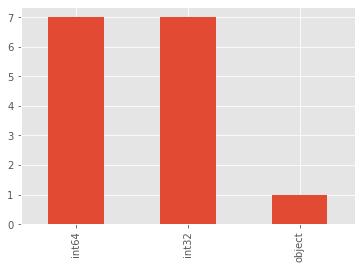

In [92]:
df.dtypes.value_counts().plot(kind='bar')

In [93]:
Null_values = df.isnull().sum()
Null_values[0:15]

SEVERITYCODE     0
OBJECTID         0
INCKEY           0
STATUS           0
ADDRTYPE         0
COLLISIONTYPE    0
PERSONCOUNT      0
PEDCOUNT         0
PEDCYLCOUNT      0
VEHCOUNT         0
JUNCTIONTYPE     0
WEATHER          0
ROADCOND         0
LIGHTCOND        0
ST_COLCODE       0
dtype: int64

In [94]:
df.shape

(194673, 15)

In [95]:
df.to_csv('new_data_collisions.csv',index=False)